Carlos J. Barreto Mora

Proyecto Final

Universidad de los Andes, Bogotá, Colombia

{jy.torres, c.barretom, ja.angulor1}@uniandes.edu.co

In [51]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import shap
import pandas as pd
import json
import numpy as np
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import joblib
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

# Importing modelling libraries
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import CalibratedClassifierCV

In [52]:
import os
file_path_1 = "Bases de datos/1_BAC.csv"
file_path_2 = "Bases de datos/2_BAC.csv"
file_path_3 = "Bases de datos/Catalogo_oficinas.csv"

df = pd.concat(
   map(pd.read_csv, [file_path_1, file_path_2]), ignore_index=True)

Catalogo = pd.read_csv(file_path_3,sep=';')
Catalogo['OficinaCD'] = Catalogo['OficinaCD'].round(decimals=0).astype(object)

In [53]:
Catalogo.dropna()

,OficinaCD,OficinaDesc,Zonal,Regional
0,16298.0,CB MISCELANEA Y LICORES LA 69,VALLE,OCCIDENTE
1,18354.0,CB HATO COROZAL,CASANARE,ORIENTE
2,19405.0,CB ALMACEN FERREOAGRO,VALLE NORTE,CAFETERA
3,12056.0,CB DROGAS DEL NORTE,CASANARE,ORIENTE
4,16176.0,CB CAFE INTERNET AGUILA INTERACTIVA.COM,BOGOTA,BOGOTA
...,...,...,...,...
16844,19429.0,CB CAFE INTERNET DANIBY COMUNICACIONES,CUNDINAMARCA OCCIDENTE,BOGOTA
16845,18015.0,SVT - PRINCIPAL RIOACHA,MAGDALENA,COSTA
16846,29274.0,CB CAFE INTERNET CENTRO DE COMUNICACIONES LA S...,CORDOBA,ANTIOQUIA
16847,17524.0,CB DROGAS DEL NORTE No 2,VALLE,OCCIDENTE


In [54]:
df_1 = pd.merge(df, Catalogo, how='left', left_on=df['SBAN'], right_on=Catalogo['OficinaCD'])

In [55]:
#Número de datos en cada una de las variables del dataframe
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050743 entries, 0 to 1050742
Data columns (total 57 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   key_0                            1050743 non-null  int64  
 1   FechaCorte                       1050743 non-null  object 
 2   ClienteID                        1050743 non-null  int64  
 3   SegmentoDesc                     1050743 non-null  object 
 4   SBAN                             1050743 non-null  int64  
 5   TipoDoctoIdentificacionCD        1050743 non-null  object 
 6   TipoPersonaDesc                  1050743 non-null  object 
 7   NaturalezaJuridicaDesc           1050731 non-null  object 
 8   SexoDesc                         1032305 non-null  object 
 9   Edad                             1032305 non-null  float64
 10  EstadoCivilDesc                  1022523 non-null  object 
 11  ProfesionDesc                    1023599 non-null 

In [56]:
#Registros con valores nulos 
df_1[df_1.Regional.isnull()]

,key_0,FechaCorte,ClienteID,SegmentoDesc,SBAN,TipoDoctoIdentificacionCD,TipoPersonaDesc,NaturalezaJuridicaDesc,SexoDesc,Edad,...,NumeroProductosCaptacion,SaldoTotalCaptaciones,NumCreditosVencidos,NumeroTCVencidas,NumOperacionesCarteraVencida,SaldoTotalCarteraVencida,OficinaCD,OficinaDesc,Zonal,Regional
332595,3029,2020-09-30,114914839,AGROPECUARIA,3029,CC,PERSONA,PARTICULAR,FEMENINO,26.0,...,1,0.0,0,0,0,0,NaN,NaN,NaN,NaN
734185,3029,2020-09-30,203103945,AGROPECUARIA,3029,CC,PERSONA,PARTICULAR,FEMENINO,21.0,...,1,0.0,0,0,0,0,NaN,NaN,NaN,NaN


In [57]:
df_1 = df_1[df_1.OficinaCD.notnull()].drop(['key_0','OficinaCD','OficinaDesc','Zonal'], axis=1)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050741 entries, 0 to 1050742
Data columns (total 53 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   FechaCorte                       1050741 non-null  object 
 1   ClienteID                        1050741 non-null  int64  
 2   SegmentoDesc                     1050741 non-null  object 
 3   SBAN                             1050741 non-null  int64  
 4   TipoDoctoIdentificacionCD        1050741 non-null  object 
 5   TipoPersonaDesc                  1050741 non-null  object 
 6   NaturalezaJuridicaDesc           1050729 non-null  object 
 7   SexoDesc                         1032303 non-null  object 
 8   Edad                             1032303 non-null  float64
 9   EstadoCivilDesc                  1022521 non-null  object 
 10  ProfesionDesc                    1023597 non-null  object 
 11  Cod_CIIU                         1050717 non-null 

In [58]:
print(f"Datasets lengh: {len(df_1)}")
for col in df_1.columns[0:17,]:
    print(f"Unique values for {col}: {len(set(df_1[col]))}")

Datasets lengh: 1050741
Unique values for FechaCorte: 1
Unique values for ClienteID: 1050741
Unique values for SegmentoDesc: 1
Unique values for SBAN: 785
Unique values for TipoDoctoIdentificacionCD: 9
Unique values for TipoPersonaDesc: 2
Unique values for NaturalezaJuridicaDesc: 3
Unique values for SexoDesc: 3
Unique values for Edad: 18553
Unique values for EstadoCivilDesc: 7
Unique values for ProfesionDesc: 153
Unique values for Cod_CIIU: 483
Unique values for ClienteFallecido: 2
Unique values for indClienteEsEmpleado: 3
Unique values for FechaVinculacionBAC: 16956
Unique values for EstadoClienteDesc: 2
Unique values for TipoClienteDesc: 2


In [59]:
pd.unique(df_1['TipoDoctoIdentificacionCD'])

array(['CC', 'N', 'CE', 'TI', 'NI', 'RC', 'PP', 'JU', 'PA'], dtype=object)

In [60]:
datos=df_1[df_1['TipoDoctoIdentificacionCD']=="CC"]

In [61]:
print(f"Datasets lengh: {len(datos)}")
for col in datos.columns[0:17,]:
    print(f"Unique values for {col}: {len(set(datos[col]))}")

Datasets lengh: 1031749
Unique values for FechaCorte: 1
Unique values for ClienteID: 1031749
Unique values for SegmentoDesc: 1
Unique values for SBAN: 785
Unique values for TipoDoctoIdentificacionCD: 1
Unique values for TipoPersonaDesc: 1
Unique values for NaturalezaJuridicaDesc: 2
Unique values for SexoDesc: 2
Unique values for Edad: 100
Unique values for EstadoCivilDesc: 7
Unique values for ProfesionDesc: 153
Unique values for Cod_CIIU: 417
Unique values for ClienteFallecido: 2
Unique values for indClienteEsEmpleado: 3
Unique values for FechaVinculacionBAC: 16934
Unique values for EstadoClienteDesc: 2
Unique values for TipoClienteDesc: 2


In [62]:
datos_1=datos.drop(['FechaCorte','SegmentoDesc','TipoPersonaDesc','Cod_CIIU'],axis=1)

In [63]:
datos_1.isnull().sum()

ClienteID                               0
SBAN                                    0
TipoDoctoIdentificacionCD               0
NaturalezaJuridicaDesc                 12
SexoDesc                                0
Edad                                    0
EstadoCivilDesc                      9780
ProfesionDesc                        8704
ClienteFallecido                        0
indClienteEsEmpleado                   11
FechaVinculacionBAC                    16
EstadoClienteDesc                       0
TipoClienteDesc                         0
ValorActivos                         8606
ValorEgresos                         7886
ValorIngresos                        7983
ValorOtrosingresos                 409925
ValorPatrimonio                      8606
TotalPasivos                         8768
NumCreditos                             0
SaldoCreditos                           0
SaldoCarteraVencida                     0
NumeroTC                                0
SaldoTC                           

In [64]:
print(pd.unique(datos_1['NaturalezaJuridicaDesc']))
print(pd.unique(datos_1['indClienteEsEmpleado']))
print(pd.unique(datos_1['FechaVinculacionBAC']))

['PARTICULAR' nan]
['N' 'S' nan]
['1982-12-30' '2006-02-09' '2004-11-11' ... '1976-09-12' '1979-10-22'
 '1980-03-09']


In [65]:
datos_1=datos_1.dropna(subset=['indClienteEsEmpleado', 'FechaVinculacionBAC'])

In [66]:
datos_1["NaturalezaJuridicaDesc"].fillna("PARTICULAR", inplace = True) 

In [67]:
pd.unique(datos_1['NaturalezaJuridicaDesc'])

array(['PARTICULAR'], dtype=object)

In [68]:
datos_1.isnull().sum()

ClienteID                               0
SBAN                                    0
TipoDoctoIdentificacionCD               0
NaturalezaJuridicaDesc                  0
SexoDesc                                0
Edad                                    0
EstadoCivilDesc                      9780
ProfesionDesc                        8704
ClienteFallecido                        0
indClienteEsEmpleado                    0
FechaVinculacionBAC                     0
EstadoClienteDesc                       0
TipoClienteDesc                         0
ValorActivos                         8595
ValorEgresos                         7875
ValorIngresos                        7972
ValorOtrosingresos                 409898
ValorPatrimonio                      8595
TotalPasivos                         8757
NumCreditos                             0
SaldoCreditos                           0
SaldoCarteraVencida                     0
NumeroTC                                0
SaldoTC                           

In [69]:
datos_2=datos_1.groupby("Regional")['Regional'].count()
datos_2

Regional
ANTIOQUIA    130923
BOGOTA       141525
CAFETERA      63606
COSTA         60384
OCCIDENTE    191238
ORIENTE      139880
SANTANDER    107208
SUR          196958
Name: Regional, dtype: int64

In [70]:
datos_3=datos_1[datos_1.Regional.isin(['BOGOTA','SUR','SANTANDER','CAFETERA'])]
print(f"Datasets lengh: {len(datos_3)}")
datos_3.isnull().sum()

Datasets lengh: 509297


ClienteID                               0
SBAN                                    0
TipoDoctoIdentificacionCD               0
NaturalezaJuridicaDesc                  0
SexoDesc                                0
Edad                                    0
EstadoCivilDesc                      4020
ProfesionDesc                        3627
ClienteFallecido                        0
indClienteEsEmpleado                    0
FechaVinculacionBAC                     0
EstadoClienteDesc                       0
TipoClienteDesc                         0
ValorActivos                         4279
ValorEgresos                         4040
ValorIngresos                        4078
ValorOtrosingresos                 195860
ValorPatrimonio                      4279
TotalPasivos                         4242
NumCreditos                             0
SaldoCreditos                           0
SaldoCarteraVencida                     0
NumeroTC                                0
SaldoTC                           

In [71]:
datos_4=datos_3.fillna({'EstadoCivilDesc':'NO REPORTA','ProfesionDesc':'NO REPORTA'})

In [72]:
datos_4["ValorOtrosingresos"].fillna(0, inplace = True)

In [73]:
na_cols = datos_4.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
for col in datos_4.columns[1:]:
     if col in na_cols:
        if datos_4[col].dtype != 'object':
             datos_4[col] =  datos_4[col].fillna(datos_4[col].mean()).round(0)

In [74]:
print(f"Datasets lengh: {len(datos_4)}")
datos_4.isnull().sum()

Datasets lengh: 509297


ClienteID                          0
SBAN                               0
TipoDoctoIdentificacionCD          0
NaturalezaJuridicaDesc             0
SexoDesc                           0
Edad                               0
EstadoCivilDesc                    0
ProfesionDesc                      0
ClienteFallecido                   0
indClienteEsEmpleado               0
FechaVinculacionBAC                0
EstadoClienteDesc                  0
TipoClienteDesc                    0
ValorActivos                       0
ValorEgresos                       0
ValorIngresos                      0
ValorOtrosingresos                 0
ValorPatrimonio                    0
TotalPasivos                       0
NumCreditos                        0
SaldoCreditos                      0
SaldoCarteraVencida                0
NumeroTC                           0
SaldoTC                            0
SaldoTCVencido                     0
NumeroSobregisrosUso               0
SaldoSobregirosUso                 0
S

In [75]:
print(pd.unique(datos_1['EstadoClienteDesc']))

['INACTIVO' 'ACTIVO']


In [76]:
datos_4['Churn']=datos_4['EstadoClienteDesc'].map({'INACTIVO':1,'ACTIVO':0})

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


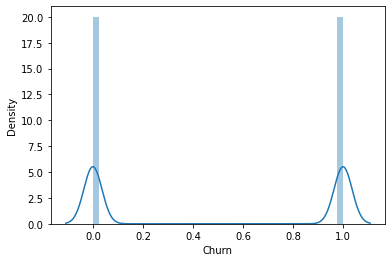

In [77]:
plot=sns.distplot(datos_4['Churn'])

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


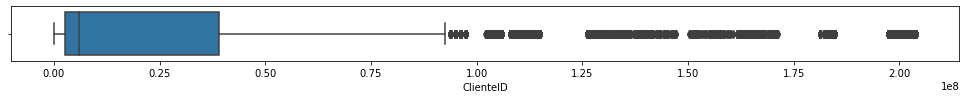

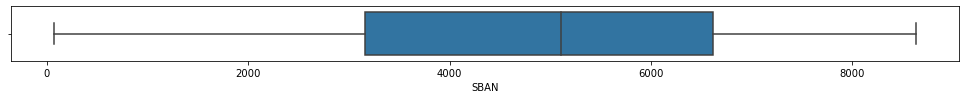

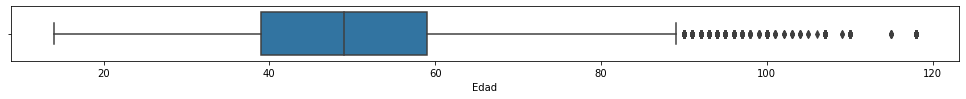

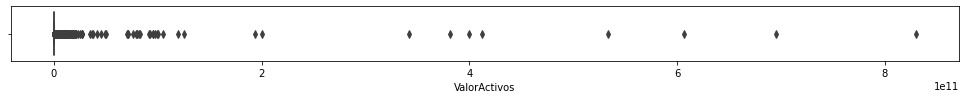

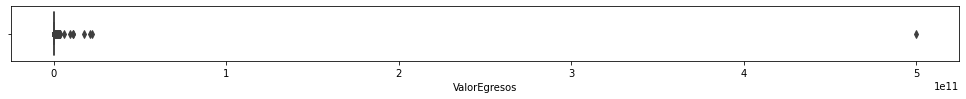

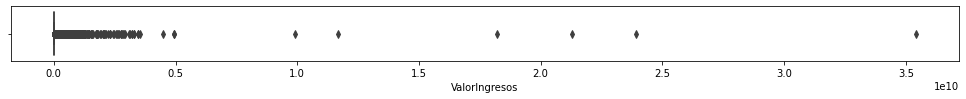

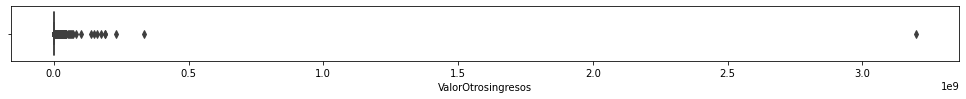

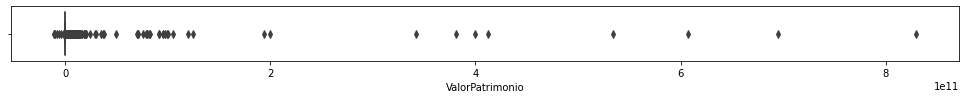

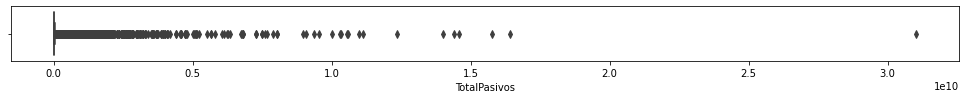

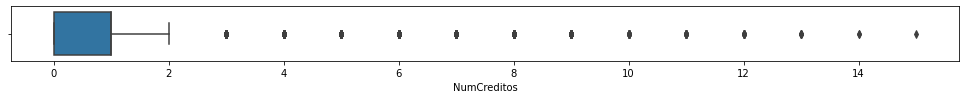

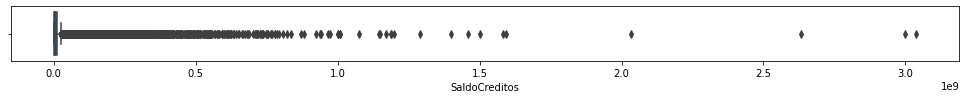

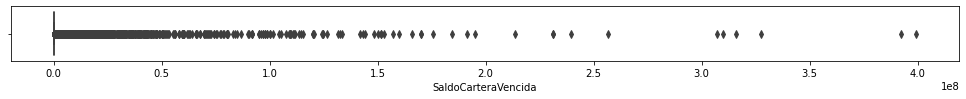

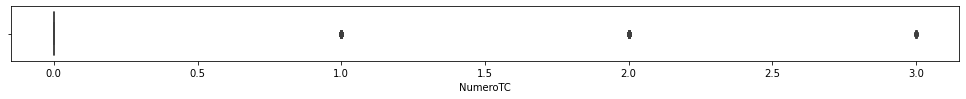

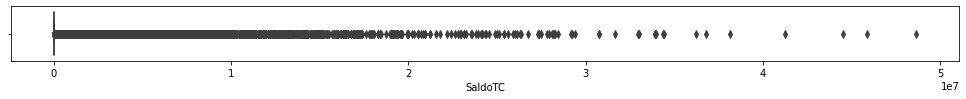

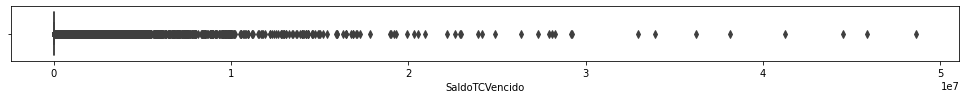

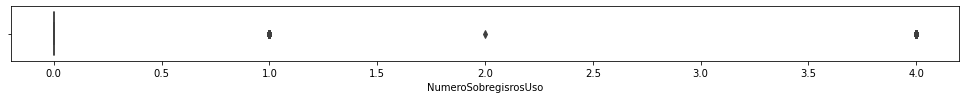

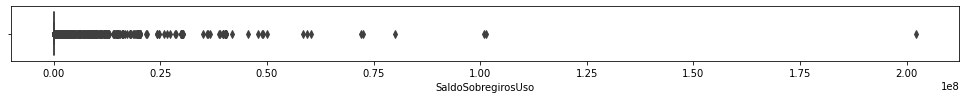

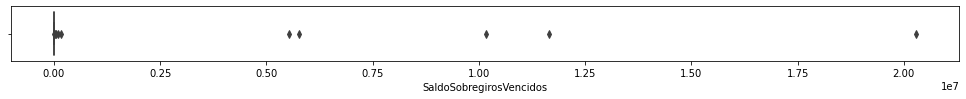

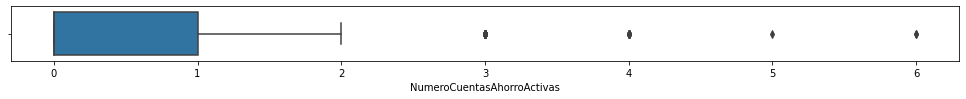

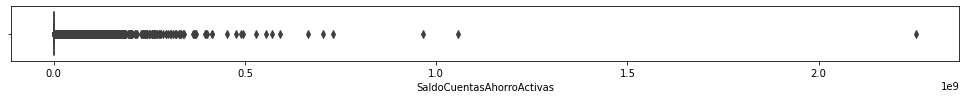

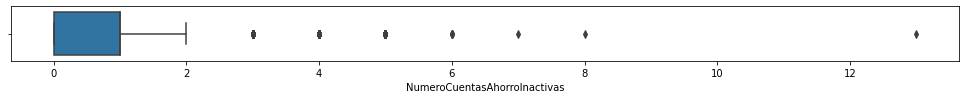

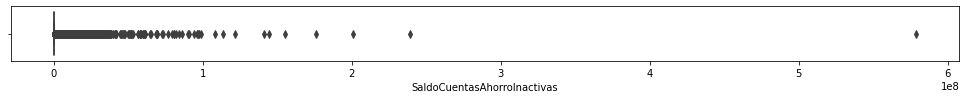

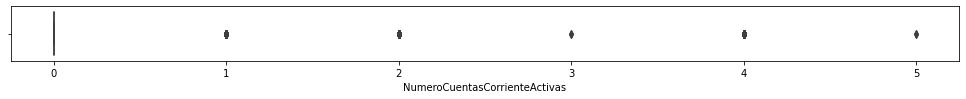

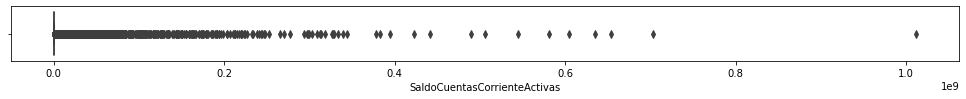

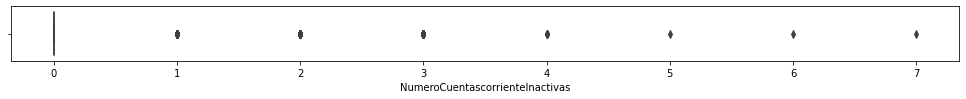

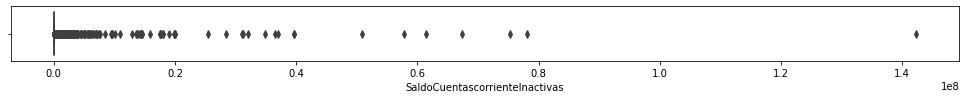

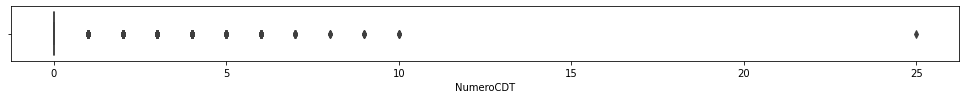

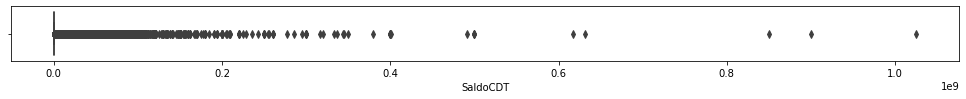

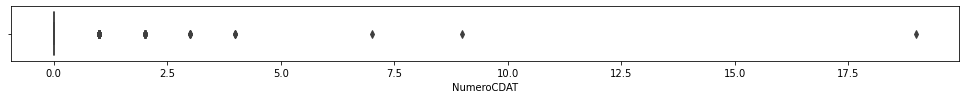

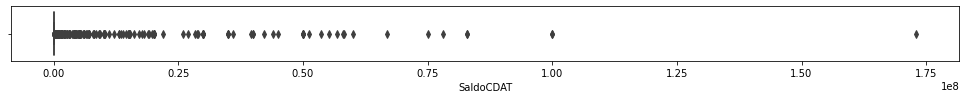

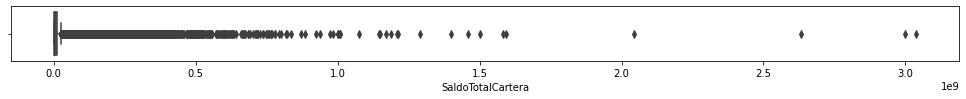

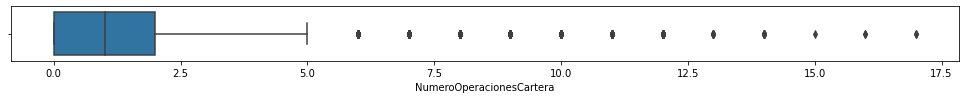

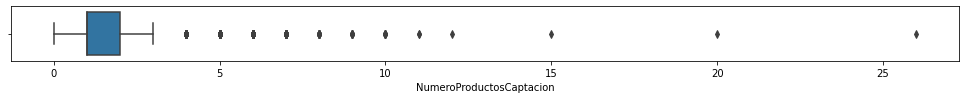

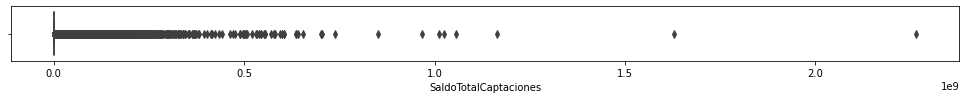

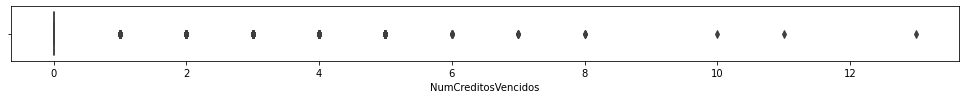

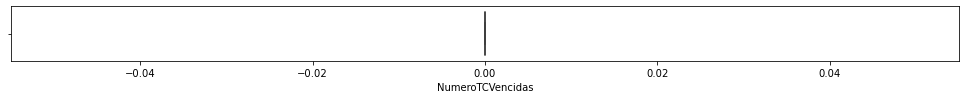

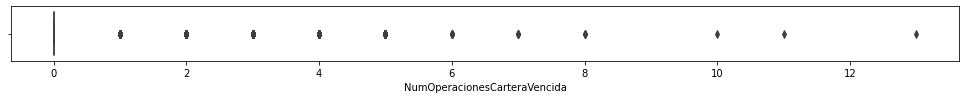

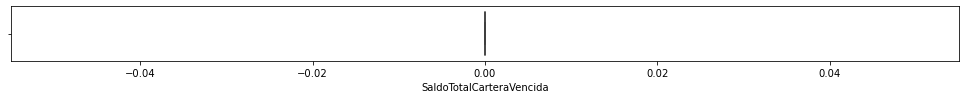

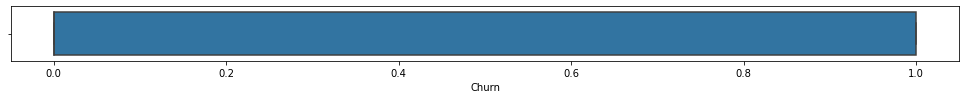

In [78]:
df1=datos_4.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)

In [79]:
datos[datos.duplicated()==True]

,FechaCorte,ClienteID,SegmentoDesc,SBAN,TipoDoctoIdentificacionCD,TipoPersonaDesc,NaturalezaJuridicaDesc,SexoDesc,Edad,EstadoCivilDesc,...,SaldoCDAT,SaldoTotalCartera,NumeroOperacionesCartera,NumeroProductosCaptacion,SaldoTotalCaptaciones,NumCreditosVencidos,NumeroTCVencidas,NumOperacionesCarteraVencida,SaldoTotalCarteraVencida,Regional


In [80]:
datos=datos.drop(['FechaCorte'],axis=1)

In [81]:
datos_4.isnull().sum()

ClienteID                          0
SBAN                               0
TipoDoctoIdentificacionCD          0
NaturalezaJuridicaDesc             0
SexoDesc                           0
Edad                               0
EstadoCivilDesc                    0
ProfesionDesc                      0
ClienteFallecido                   0
indClienteEsEmpleado               0
FechaVinculacionBAC                0
EstadoClienteDesc                  0
TipoClienteDesc                    0
ValorActivos                       0
ValorEgresos                       0
ValorIngresos                      0
ValorOtrosingresos                 0
ValorPatrimonio                    0
TotalPasivos                       0
NumCreditos                        0
SaldoCreditos                      0
SaldoCarteraVencida                0
NumeroTC                           0
SaldoTC                            0
SaldoTCVencido                     0
NumeroSobregisrosUso               0
SaldoSobregirosUso                 0
S

In [82]:
datos_nulos=datos[datos.NaturalezaJuridicaDesc.isnull()]
datos_nulos

,ClienteID,SegmentoDesc,SBAN,TipoDoctoIdentificacionCD,TipoPersonaDesc,NaturalezaJuridicaDesc,SexoDesc,Edad,EstadoCivilDesc,ProfesionDesc,...,SaldoCDAT,SaldoTotalCartera,NumeroOperacionesCartera,NumeroProductosCaptacion,SaldoTotalCaptaciones,NumCreditosVencidos,NumeroTCVencidas,NumOperacionesCarteraVencida,SaldoTotalCarteraVencida,Regional
100622,202113758,AGROPECUARIA,6915,CC,PERSONA,NaN,MASCULINO,29.0,SOLTERO,SIN PROFESION,...,0.0,0.0,0,1,6106.0,0,0,0,0,OCCIDENTE
104128,184160841,AGROPECUARIA,7370,CC,PERSONA,NaN,MASCULINO,30.0,SOLTERO,SIN PROFESION,...,0.0,0.0,0,1,6346.0,0,0,0,0,BOGOTA
394234,201414323,AGROPECUARIA,5130,CC,PERSONA,NaN,FEMENINO,21.0,SOLTERO,INGENIERO,...,0.0,0.0,0,2,126956.0,0,0,0,0,SANTANDER
505138,198803886,AGROPECUARIA,1428,CC,PERSONA,NaN,MASCULINO,36.0,SOLTERO,SIN PROFESION,...,0.0,0.0,0,1,31642.6,0,0,0,0,ANTIOQUIA
547658,202113883,AGROPECUARIA,4230,CC,PERSONA,NaN,MASCULINO,58.0,SOLTERO,SIN PROFESION,...,0.0,0.0,0,1,3179.0,0,0,0,0,COSTA
554815,202099649,AGROPECUARIA,4816,CC,PERSONA,NaN,MASCULINO,28.0,SOLTERO,SIN PROFESION,...,0.0,0.0,0,1,2134639.0,0,0,0,0,OCCIDENTE
603425,201536463,AGROPECUARIA,360,CC,PERSONA,NaN,MASCULINO,21.0,SOLTERO,SIN PROFESION,...,0.0,0.0,0,1,8000.0,0,0,0,0,BOGOTA
629220,128853041,AGROPECUARIA,6921,CC,PERSONA,NaN,MASCULINO,67.0,UNION LIBRE,"TECNICO PROFESIONAL - INGENIERIA, ARQUITECTURA...",...,0.0,12599389.0,1,2,1412953.0,0,0,0,0,OCCIDENTE
666352,140880243,AGROPECUARIA,4884,CC,PERSONA,NaN,MASCULINO,21.0,SOLTERO,SIN PROFESION,...,0.0,5000000.0,1,2,17356.0,0,0,0,0,OCCIDENTE
728830,201241040,AGROPECUARIA,6032,CC,PERSONA,NaN,MASCULINO,21.0,SOLTERO,INGENIERO,...,0.0,22000000.0,1,2,1349.0,0,0,0,0,SANTANDER


In [83]:
datos_4['FechaVinculacionBAC']=datos_4['FechaVinculacionBAC'].apply(pd.to_datetime)

In [84]:
datos_4.dtypes

ClienteID                                   int64
SBAN                                        int64
TipoDoctoIdentificacionCD                  object
NaturalezaJuridicaDesc                     object
SexoDesc                                   object
Edad                                      float64
EstadoCivilDesc                            object
ProfesionDesc                              object
ClienteFallecido                           object
indClienteEsEmpleado                       object
FechaVinculacionBAC                datetime64[ns]
EstadoClienteDesc                          object
TipoClienteDesc                            object
ValorActivos                              float64
ValorEgresos                              float64
ValorIngresos                             float64
ValorOtrosingresos                        float64
ValorPatrimonio                           float64
TotalPasivos                              float64
NumCreditos                                 int64


In [85]:
#Variables categóricas
print("Valores posibles de la variable TipoDoctoIdentificacionCD")
print(datos_4['TipoDoctoIdentificacionCD'].unique())
print()
print("Valores posibles de la variable NaturalezaJuridicaDesc")
print(datos_4['NaturalezaJuridicaDesc'].unique())
print
print("Valores posibles de la variable SexoDesc")
print(datos_4['SexoDesc'].unique())
print()
print("Valores posibles de la variable EstadoCivilDesc")
print(datos_4['EstadoCivilDesc'].unique())
print()
print("Valores posibles de la variable ProfesionDesc")
print(datos_4['ProfesionDesc'].unique())
print()
print("Valores posibles de la variable ClienteFallecido")
print(datos_4['ClienteFallecido'].unique())
print()
print("Valores posibles de la variable EstadoClienteDesc")
print(datos_4['EstadoClienteDesc'].unique())
print()
print("Valores posibles de la variable TipoClienteDesc")
print(datos_4['TipoClienteDesc'].unique())
print()
print("Valores posibles de la variable Regional")
print(datos_4['Regional'].unique())
print()
print("Valores posibles de la variable indClienteEsEmpleado")
print(datos_4['indClienteEsEmpleado'].unique())
print()

Valores posibles de la variable TipoDoctoIdentificacionCD
['CC']

Valores posibles de la variable NaturalezaJuridicaDesc
['PARTICULAR']
Valores posibles de la variable SexoDesc
['MASCULINO' 'FEMENINO']

Valores posibles de la variable EstadoCivilDesc
['SOLTERO' 'CASADO' 'UNION LIBRE' 'SEPARADO' 'VIUDO' 'DIVORCIADO'
 'NO REPORTA']

Valores posibles de la variable ProfesionDesc
['SIN PROFESION' 'ZOOTECNISTA' 'AGRICULTOR' 'DOCENTE' 'AGRONOMO'
 'GANADERO' 'TECNICO PROFESIONAL - AGRONOMIA, VETERINARIA Y AFINES'
 'ADMINISTRADOR DEL MEDIO AMBIENTE' 'ADMINISTRADOR AGROPECUARIO'
 'ADMINISTRADOR DE COMERCIO EXTERIOR'
 'TECNICO PROFESIONAL - ECONOMIA, ADMINISTRACION Y CONTADURIA'
 'ENFERMERIA' 'NO REPORTA' 'ADMINISTRADOR DE  EMPRESAS' 'INGENIERO CIVIL'
 'ABOGADO' 'MEDICO VETERINARIO'
 'TECNOLOGO - INGENIERIA, ARQUITECTURA, URBANISMO Y AFINES'
 'TECNOLOGO - AGRONOMIA, VETERINARIA Y AFINES' 'INGENIERO AGRONOMICO'
 'CONTADOR' 'ADMINISTRADOR PUBLICO' 'IDIOMAS' 'INGENIERO AGROAMBIENTAL'
 'ARQUITECTO' 

In [86]:
prof_1=['SIN PROFESION','ZOOTECNISTA','AGRICULTOR','DOCENTE','AGRONOMO','GANADERO','ADMINISTRADOR DEL MEDIO AMBIENTE',
        'ADMINISTRADOR AGROPECUARIO','AGROLOGO']
prof_2=['TECNICO PROFESIONAL - AGRONOMIA, VETERINARIA Y AFINES','TECNICO PROFESIONAL - ECONOMIA, ADMINISTRACION Y CONTADURIA',
        'TECNOLOGO - INGENIERIA, ARQUITECTURA, URBANISMO Y AFINES','TECNOLOGO - AGRONOMIA, VETERINARIA Y AFINES',
        'TECNOLOGO - ECONOMIA, ADMINISTRACION, CONTADURIA Y AFINES','TECNICO PROFESIONAL - CIENCIAS DE LA SALUD', 
        'PILOTO CIVIL','TECNICO PROFESIONAL - INGENIERIA, ARQUITECTURA Y URBANISMO','TECNOLOGO - BELLAS ARTES', 
        'TECNOLOGO - CIENCIAS DE LA SALUD','TECNICO PROFESIONAL - CIENCIAS SOCIALES, DERECHO Y POLITICA',
        'TECNICO PROFESIONAL - CIENCIAS DE LA EDUCACION','TECNICO PROFESIONAL - BELLAS ARTES',
        'TECNOLOGO - HUMANIDADES Y CIENCIAS RELIGIOSAS','TECNOLOGO - CIENCIAS SOCIALES, DERECHO Y POLITICA',
        'TECNICO PROFESIONAL - MATEMATICAS Y CIENCIAS NATURALES','TECNOLOGO - CIENCIAS DE LA EDUCACION','TECNOLOGO - MATEMATICAS Y CIENCIAS NATURALES']
prof_3=['MEDICO VETERINARIO','ODONTOLOGO', 'PSICOLOGO','FISIOTERAPISTA', 'FARMACIA','SALUD OCUPACIONAL',      
       'MEDICO DERMATOLOGO','MEDICO GENERAL','INSTRUMENTACION QUIRURGICA','ADMINISTRADOR EN SALUD','MEDICO OFTALMOLOGO',
       'COSMETOLOGO','MICROBIOLOGIA','MEDICO PEDIATRA','BACTERIOLOGO','TERAPIA FISICA','NUTRICION Y DIETETICA',
       'TERAPIA OCUPACIONAL', 'MEDICO CIRUJANO PLASTICO','TERAPIA RESPIRATORIA', 'MEDICO OPTOMETRA','MEDICO CARDIOLOGO', 
       'BIOINGENIERO','MEDICO LEGAL', 'MEDICO GINECOLOGO','MEDICO UROLOGO', 'TRADUCCION SIMULTANEA','MEDICO NEUROLOGO',
       'MEDICO RADIOLOGO','MEDICO OTORRINORALINGOLOGO', 'MEDICO BACTERIOLOGO','ENFERMERIA','FONOAUDIOLOGO']
prof_4=['ADMINISTRADOR DE COMERCIO EXTERIOR','ADMINISTRADOR DE  EMPRESAS', 'ABOGADO','CONTADOR','ADMINISTRADOR PUBLICO','IDIOMAS',
'ADMINISTRADOR COMERCIAL','LICENCIADO','GASTRONOMO Y COCINA PROFESIONAL','COMUNICACION SOCIAL','ADMINISTRADOR INFORMATICO', 
'QUIMICO', 'ECONOMISTA','ADMINISTRADOR LOGISTICO', 'SECRETARIA', 'PRE ESCOLAR','ADMINISTRADOR HOTELERO','DISENO INDUSTRIAL', 
'ECOLOGO', 'PUBLICISTA','ADMINISTRADOR BANCARIO Y FINANCIERO','MERCADEO', 'DISENO GRAFICO','TRABAJO SOCIAL',
'MUSICA INSTRUMENTAL', 'DISENO DE MODAS', 'FOTOGRAFO','ADMINISTRADOR DE OBRAS CIVILES', 'BIOLOGO', 'FINANZAS', 'TEOLOGO',
'PERIODISTA', 'COMERCIO EXTERIOR', 'FILOSOFO', 'TELECOMUNICACIONES','GEOLOGO', 'CIENCIAS SOCIALES', 'SOCIOLOGO','GEOGRAFO', 
'MILITAR','ANTROPOLOGO', 'BELLAS ARTES', 'CRIMINALISTICA','HOTELERIA Y TURISMO', 'DEPORTE Y ACTIVIDAD FISICA', 'MATEMATICO',
'CINE Y TELEVISION', 'ESTADISTICO','CIENCIAS','LENGUAS CLASICAS', 'AGROZOOTECNIO', 'NEGOCIOS INTERNACIONALES','LITERATURA',
'DECORADOR DE INTERIORES','CIENCIAS MILITARES', 'RELACIONES PUBLICAS E INSTITUCIONALES','CIENCIAS POLITICAS', 'GERONTOLOGO',
'CIENCIAS DEL DEPORTE','FISICO','RECREACIONISTA','BIBLIOTECOLOGO','LENGUAS MODERNAS', 'HISTORIADOR','RELACIONES INTERNACIONALES',
'ADMINISTRADOR DEPORTIVO']
prof_5=['INGENIERO CIVIL', 'INGENIERO AGRONOMICO','INGENIERO AGROAMBIENTAL','ARQUITECTO', 'INGENIERO DE SISTEMAS','INGENIERO MECANICO', 'INGENIERO AMBIENTAL',
    'INGENIERO AGROFORESTAL', 'INGENIERO ELECTRICO','INGENIERO AGRICOLA', 'INGENIERO ELECTRONICO',
    'INGENIERO INDUSTRIAL', 'INGENIERO FINANCIERO', 'INGENIERO','INGENIERO QUIMICO', 'INGENIERO DE ALIMENTOS',
    'INGENIERO DE PRODUCCION AGRICOLA', 'CONSTRUCCION','INGENIERO DEL MEDIO AMBIENTE', 'INGENIERO COMERCIAL',
    'INGENIERO DE ACUICULTURA', 'INGENIERO ADMINISTRATIVO','INGENIERO CATASTRAL', 'INGENIERO PESQUERO']

In [87]:
for indice in range(0, len(prof_1)):
    datos_4.ProfesionDesc=datos_4.ProfesionDesc.replace({prof_1[indice]:'AGRICOLA'})
for indice in range(0, len(prof_2)):
    datos_4.ProfesionDesc=datos_4.ProfesionDesc.replace({prof_2[indice]:'TECNICO-TECNLOGO'})
for indice in range(0, len(prof_3)):
    datos_4.ProfesionDesc=datos_4.ProfesionDesc.replace({prof_3[indice]:'SALUD Y AFINES'})
for indice in range(0, len(prof_4)):
    datos_4.ProfesionDesc=datos_4.ProfesionDesc.replace({prof_4[indice]:'ADMINISTRACIÓN, CIENCIAS Y AFINES'})
for indice in range(0, len(prof_5)):
    datos_4.ProfesionDesc=datos_4.ProfesionDesc.replace({prof_5[indice]:'INGENIERIA Y AFINES'})

In [88]:
#Se reemplazan las variables categóricas por valores númericos
datos_4['Year'] = datos_4['FechaVinculacionBAC'].dt.year
df5=datos_4
df5['SexoDesc']=df5['SexoDesc'].map({'MASCULINO':0, 'FEMENINO':1})

df5['EstadoCivilDesc']=df5['EstadoCivilDesc'].map({'SOLTERO':0, 'CASADO':1, 'UNION LIBRE':2, 'SEPARADO':3, 'VIUDO':5, 'DIVORCIADO':6,'NO REPORTA':7})

df5['ProfesionDesc']=df5['ProfesionDesc'].map({'SIN PROFESION':0, 'AGRICOLA':1,'INGENIERIA Y AFINES':2,'TECNICO-TECNLOGO':3,
                                               'SALUD Y AFINES':4,'ADMINISTRACIÓN, CIENCIAS Y AFINES':5})

df5['indClienteEsEmpleado']=df5['indClienteEsEmpleado'].map({'N':0, 'S':1})

df5['TipoClienteDesc']=df5['TipoClienteDesc'].map({'Cliente Comercialmente Gestionable':0, 'Cliente Convenio':1})

df5['Regional']=df5['Regional'].map({'BOGOTA':0, 'SANTANDER':1, 'SUR':2, 'CAFETERA':3})

In [89]:
new_df=df5[df5['Year']>=2019]

In [90]:
new_df

,ClienteID,SBAN,TipoDoctoIdentificacionCD,NaturalezaJuridicaDesc,SexoDesc,Edad,EstadoCivilDesc,ProfesionDesc,ClienteFallecido,indClienteEsEmpleado,...,NumeroOperacionesCartera,NumeroProductosCaptacion,SaldoTotalCaptaciones,NumCreditosVencidos,NumeroTCVencidas,NumOperacionesCarteraVencida,SaldoTotalCarteraVencida,Regional,Churn,Year
7,202348085,820,CC,PARTICULAR,1,43.0,0,1.0,S/D,0,...,0,1,16336.0,0,0,0,0,0,1,2020
63,203247512,4525,CC,PARTICULAR,0,47.0,0,1.0,S/D,0,...,0,1,2458249.0,0,0,0,0,0,0,2020
77,198720992,910,CC,PARTICULAR,1,55.0,1,1.0,S/D,0,...,2,1,1.0,0,0,0,0,0,0,2019
153,203331629,6654,CC,PARTICULAR,1,19.0,0,1.0,S/D,0,...,0,1,6000000.0,0,0,0,0,2,1,2020
192,199378897,6619,CC,PARTICULAR,1,21.0,0,1.0,S/D,0,...,1,1,10077.0,0,0,0,0,2,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050503,197289764,6026,CC,PARTICULAR,0,26.0,0,3.0,S/D,0,...,1,1,66791.0,0,0,0,0,1,0,2019
1050514,198548762,6017,CC,PARTICULAR,1,25.0,0,3.0,S/D,0,...,1,1,1811912.0,0,0,0,0,1,0,2019
1050547,197995774,3114,CC,PARTICULAR,0,59.0,0,1.0,S/D,0,...,1,1,583981.0,0,0,0,0,0,0,2019
1050666,202486934,6064,CC,PARTICULAR,0,39.0,1,1.0,S/D,0,...,1,1,3474.0,0,0,0,0,1,0,2020


In [91]:
df4_N=new_df.drop(['ClienteID','SBAN','TipoDoctoIdentificacionCD','NaturalezaJuridicaDesc','EstadoClienteDesc','ClienteFallecido','FechaVinculacionBAC'], axis=1)
df4_N

,SexoDesc,Edad,EstadoCivilDesc,ProfesionDesc,indClienteEsEmpleado,TipoClienteDesc,ValorActivos,ValorEgresos,ValorIngresos,ValorOtrosingresos,...,NumeroOperacionesCartera,NumeroProductosCaptacion,SaldoTotalCaptaciones,NumCreditosVencidos,NumeroTCVencidas,NumOperacionesCarteraVencida,SaldoTotalCarteraVencida,Regional,Churn,Year
7,1,43.0,0,1.0,0,0,110000000.0,1200000.0,3000000.0,0.0,...,0,1,16336.0,0,0,0,0,0,1,2020
63,0,47.0,0,1.0,0,0,5000000.0,150000.0,877803.0,0.0,...,0,1,2458249.0,0,0,0,0,0,0,2020
77,1,55.0,1,1.0,0,0,401130000.0,25416000.0,31563333.0,0.0,...,2,1,1.0,0,0,0,0,0,0,2019
153,1,19.0,0,1.0,0,0,30000000.0,500000.0,2200000.0,0.0,...,0,1,6000000.0,0,0,0,0,2,1,2020
192,1,21.0,0,1.0,0,0,58200000.0,380000.0,2900000.0,0.0,...,1,1,10077.0,0,0,0,0,2,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050503,0,26.0,0,3.0,0,0,30000000.0,750000.0,2000000.0,0.0,...,1,1,66791.0,0,0,0,0,1,0,2019
1050514,1,25.0,0,3.0,0,0,60000000.0,600000.0,2900000.0,0.0,...,1,1,1811912.0,0,0,0,0,1,0,2019
1050547,0,59.0,0,1.0,0,0,27150000.0,330000.0,2090000.0,0.0,...,1,1,583981.0,0,0,0,0,0,0,2019
1050666,0,39.0,1,1.0,0,0,40000000.0,350000.0,1950000.0,0.0,...,1,1,3474.0,0,0,0,0,1,0,2020


In [94]:
#Selección de variables dependientes e independietes
X = df4_N.drop(['Churn'], axis=1)
Y= df4_N['Churn']

In [97]:
# División de la matriz en datos de entrenamiento (70%) y  prueba (30%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [98]:
#Definición de los modelos de entrenamiento
DTclassifier = DecisionTreeClassifier()
RandomForestclassifier = RandomForestClassifier()
LOGISTICclassifier = LogisticRegression()

In [99]:
DTclassifier.fit(X_train, Y_train)
RandomForestclassifier.fit(X_train, Y_train)
LOGISTICclassifier.fit(X_train, Y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [100]:
DTpred = DTclassifier.predict(X_train)
RFpred = RandomForestclassifier.predict(X_train)
LOGISTICpred = LOGISTICclassifier.predict(X_train)

In [101]:
DTaccuracy = accuracy_score(Y_train, DTpred)
print("Accuracy of the Decision Tree Classifier: ",DTaccuracy)

RFaccuracy = accuracy_score(Y_train, RFpred)
print("Accuracy of the Random Forest Classifier: ",RFaccuracy)

LOGISTICaccuracy = accuracy_score(Y_train, LOGISTICpred)
print("Accuracy of the Logistic Regression Classifier: ",LOGISTICaccuracy)

Accuracy of the Decision Tree Classifier:  0.9998978236436089
Accuracy of the Random Forest Classifier:  0.9998978236436089
Accuracy of the Logistic Regression Classifier:  0.5025544089097783


In [103]:
cmDT = confusion_matrix(Y_train,DTpred)
cmDT

array([[9802,    0],
       [   2, 9770]], dtype=int64)

In [104]:
print(classification_report(Y_train, DTpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9802
           1       1.00      1.00      1.00      9772

    accuracy                           1.00     19574
   macro avg       1.00      1.00      1.00     19574
weighted avg       1.00      1.00      1.00     19574



In [105]:
DTpred2 = DTclassifier.predict(X_test)
cmDT2 = confusion_matrix(Y_test,DTpred2)
cmDT2

array([[2075, 2096],
       [2140, 2078]], dtype=int64)

In [106]:
print(classification_report(Y_test, DTpred2))

              precision    recall  f1-score   support

           0       0.49      0.50      0.49      4171
           1       0.50      0.49      0.50      4218

    accuracy                           0.50      8389
   macro avg       0.50      0.50      0.50      8389
weighted avg       0.50      0.50      0.50      8389



In [107]:
cmRF = confusion_matrix(Y_train,RFpred)
cmRF

array([[9800,    2],
       [   0, 9772]], dtype=int64)

In [108]:
print(classification_report(Y_train, RFpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9802
           1       1.00      1.00      1.00      9772

    accuracy                           1.00     19574
   macro avg       1.00      1.00      1.00     19574
weighted avg       1.00      1.00      1.00     19574



In [109]:
RFpred2 = RandomForestclassifier.predict(X_test)
print(classification_report(Y_test, RFpred2))

              precision    recall  f1-score   support

           0       0.49      0.53      0.51      4171
           1       0.50      0.47      0.48      4218

    accuracy                           0.50      8389
   macro avg       0.50      0.50      0.50      8389
weighted avg       0.50      0.50      0.50      8389



>1, train: 0.504, test: 0.503
>2, train: 0.505, test: 0.496
>3, train: 0.509, test: 0.499
>4, train: 0.510, test: 0.497
>5, train: 0.512, test: 0.500
>6, train: 0.513, test: 0.500
>7, train: 0.516, test: 0.498
>8, train: 0.520, test: 0.500
>9, train: 0.524, test: 0.499
>10, train: 0.527, test: 0.498
>11, train: 0.530, test: 0.497
>12, train: 0.540, test: 0.494
>13, train: 0.545, test: 0.496
>14, train: 0.549, test: 0.494
>15, train: 0.553, test: 0.495
>16, train: 0.560, test: 0.498
>17, train: 0.564, test: 0.498
>18, train: 0.572, test: 0.497
>19, train: 0.579, test: 0.496
>20, train: 0.585, test: 0.497
>21, train: 0.593, test: 0.498
>22, train: 0.599, test: 0.497
>23, train: 0.608, test: 0.502
>24, train: 0.618, test: 0.501
>25, train: 0.628, test: 0.503
>26, train: 0.636, test: 0.503
>27, train: 0.650, test: 0.504
>28, train: 0.659, test: 0.503
>29, train: 0.671, test: 0.502


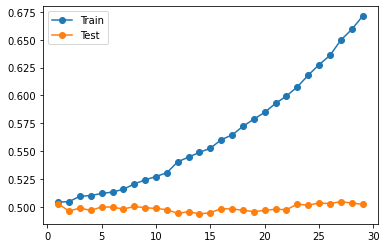

In [110]:
# Definición de las listas para colocar los scores obtenidos
train_scores, test_scores = list(), list()
# Definción de la máxima profundidad del arbol
values = [i for i in range(1, 30)]
for i in values:
	# Configuración del modelo
	model = DecisionTreeClassifier(max_depth=i, criterion = 'gini',min_samples_leaf=2)
	# fit model on the training dataset
	model.fit(X_train, Y_train)
	# Evaluación de los datos de entrenamiento
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(Y_train, train_yhat)
	train_scores.append(train_acc)
	# Evaluación en los datos de prueba
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(Y_test, test_yhat)
	test_scores.append(test_acc)
	# Valores obenidos apra cada profundidad
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# Gráfico de los datos de prueba y entrenamiento en función de la profundidad
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

# Alternativa 3

In [111]:
X = np.array(df4_N.drop(['Churn','Year'],1))
Y= np.array(df4_N['Churn'])
# Splitting feature matrix for training (70%) and test (30%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state = 500)

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


In [112]:
# data normalization with sklearn
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [113]:
r=26
DTclassifier = DecisionTreeClassifier(criterion = 'entropy',random_state=r)
XGBoostclassifier = XGBClassifier()
RandomForestclassifier = RandomForestClassifier(criterion = 'entropy')
SVMclassifier = SVC(kernel='rbf',probability=True)
LOGISTICclassifier = LogisticRegression()
KNNclassifier = KNeighborsClassifier()
GNBclassifier = GaussianNB() 
BaggingClassifier= BaggingClassifier(random_state=r)
NeuralNetworkClassifier= MLPClassifier(random_state=r)
GBM = GradientBoostingClassifier(random_state=r)

In [114]:
DTclassifier.fit(X_train, Y_train)
DTpred = DTclassifier.predict(X_test)
DTaccuracy = accuracy_score(Y_test, DTpred)
print("Accuracy of the Decision Tree Classifier: ",DTaccuracy)

Accuracy of the Decision Tree Classifier:  0.503158898557635


In [115]:
XGBoostclassifier.fit(X_train, Y_train)
XGBpred = XGBoostclassifier.predict(X_test)
XGBaccuracy = accuracy_score(Y_test, XGBpred)
print("Accuracy of the XGBoost Classifier: ",XGBaccuracy)

Accuracy of the XGBoost Classifier:  0.4956490642508046


In [116]:
RandomForestclassifier.fit(X_train, Y_train)
RFpred = RandomForestclassifier.predict(X_test)
RFaccuracy = accuracy_score(Y_test, RFpred)
print("Accuracy of the Random Forest Classifier: ",RFaccuracy)

Accuracy of the Random Forest Classifier:  0.4927881749910597


In [117]:
LOGISTICclassifier.fit(X_train, Y_train)
LOGISTICpred = LOGISTICclassifier.predict(X_test)
LOGISTICaccuracy = accuracy_score(Y_test, LOGISTICpred)
print("Accuracy of the Logistic Regression Classifier: ",LOGISTICaccuracy)

Accuracy of the Logistic Regression Classifier:  0.5018476576469186


In [118]:
GNBclassifier.fit(X_train, Y_train)
GNBpred = GNBclassifier.predict(X_test)
GNBaccuracy = accuracy_score(Y_test, GNBpred)
print("Accuracy of the GNB Classifier: ", GNBaccuracy) 

Accuracy of the GNB Classifier:  0.5016092502086065


In [119]:
BaggingClassifier.fit(X_train, Y_train)
Baggingpred= BaggingClassifier.predict(X_test)
Baggingaccuracy = accuracy_score(Y_test, Baggingpred)
print("Accuracy of the Bagging Classifier: ", Baggingaccuracy)

Accuracy of the Bagging Classifier:  0.493622601025152


In [120]:
NeuralNetworkClassifier.fit(X_train, Y_train)
NNpred= NeuralNetworkClassifier.predict(X_test)
NNaccuracy = accuracy_score(Y_test, NNpred)
print("Accuracy of the Neural Network Classifier: ", NNaccuracy)

Accuracy of the Neural Network Classifier:  0.49827154607223745


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [121]:
GBM.fit(X_train, Y_train)
GBMpred= GBM.predict(X_test)
GBMaccuracy = accuracy_score(Y_test, GBMpred)
print("Accuracy of the GBM Classifier: ", GBMaccuracy)

Accuracy of the GBM Classifier:  0.49421861962093216


In [125]:
importances = DTclassifier.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df4_N.columns[1:]
 
for f in range(X_test.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) EstadoCivilDesc                0.127562
 2) ValorIngresos                  0.122632
 3) NumCreditosVencidos            0.103740
 4) ValorOtrosingresos             0.102861
 5) TotalPasivos                   0.096350
 6) NumeroCuentasAhorroInactivas   0.089301
 7) ValorEgresos                   0.065580
 8) NumCreditos                    0.063416
 9) NumeroOperacionesCartera       0.038722
10) SaldoCarteraVencida            0.035548
11) ProfesionDesc                  0.034054
12) Churn                          0.029801
13) NumeroCuentasCorrienteActivas  0.020311
14) Edad                           0.017523
15) indClienteEsEmpleado           0.015583
16) SaldoTCVencido                 0.006804
17) NumeroProductosCaptacion       0.005946
18) SaldoCreditos                  0.005202
19) SaldoCuentasAhorroActivas      0.003578
20) NumeroCDAT                     0.002849
21) SaldoTotalCaptaciones          0.002570
22) NumeroCuentascorrienteInactivas 0.002185
23) NumeroTC                   

In [126]:
DTclassifier.feature_importances_

array([0.01752292, 0.12756215, 0.03405442, 0.01558329, 0.        ,
       0.        , 0.06558025, 0.12263152, 0.10286132, 0.        ,
       0.09635008, 0.06341557, 0.00520237, 0.03554829, 0.00195094,
       0.00138064, 0.00680441, 0.00032319, 0.        , 0.        ,
       0.        , 0.00357849, 0.08930138, 0.00145355, 0.02031081,
       0.00078662, 0.00218462, 0.00018443, 0.0003169 , 0.00077915,
       0.00284921, 0.        , 0.        , 0.03872247, 0.00594624,
       0.00257043, 0.1037397 , 0.00029229, 0.        , 0.00041176,
       0.        , 0.02980058])

In [127]:
DTclassifier.feature_importances_.argsort()

array([20, 40, 38, 19,  4,  5, 18, 31, 32,  9, 27, 37, 28, 17, 39, 29, 25,
       15, 23, 14, 26, 35, 30, 21, 12, 34, 16,  3,  0, 24, 41,  2, 13, 33,
       11,  6, 22, 10,  8, 36,  7,  1], dtype=int64)

In [128]:
explainer = shap.Explainer(DTclassifier.predict, X_test)
shap_values = explainer(X_test)

Permutation explainer: 8390it [03:00, 45.07it/s]                          


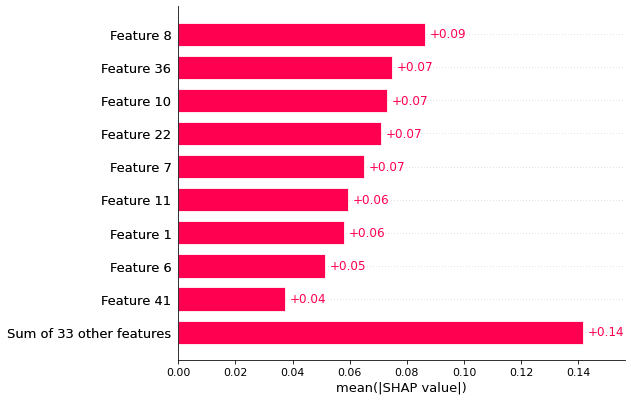

In [129]:
shap.plots.bar(shap_values)